In [43]:
import cmocean.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table
from salishsea_tools import viz_tools

In [44]:
def compare_stats(res_201905R, res_202111, metric):
    if np.abs(res_201905R[metric].values[0]) < np.abs(res_202111[metric].values[0]):
        return '201905R'
    elif np.abs(res_201905R[metric].values[0]) > np.abs(res_202111[metric].values[0]):
        return '202111'
    else:
        return 'same'

In [45]:
def compile_compare(res_201905R, res_202111, metric, regions):
    met_vec = []
    for region in regions:
        met_vec = met_vec + [compare_stats(res_201905R[res_201905R['region'] == region], res_202111[res_202111['region'] == region], metric)]
    return met_vec

In [46]:
plt.rcParams.update({'font.size': 18})

In [47]:
color1 = '#4f8cf0'
color2 = '#162845'
color3 = '#345d9e'

In [48]:
results_all = pd.read_csv('results_0_10_noferry.csv')
results_all_top30 = pd.read_csv('results_0_30_noferry.csv')
results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
cols = results_all.columns.tolist()
cols.insert(0, cols.pop(cols.index('region')))
results_all = results_all.reindex(columns=cols)
results_201905R = results_all[results_all['model'] == '201905R']
results_202111 = results_all[results_all['model'] == '202111']

In [49]:
regions = list(results_201905R['region'].values)

In [50]:
results_all

,region,model,number,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread
0,Nooksack,201905R,493,-0.372496,1.343144,1.290458,0.194442,0.107826,2.676550,0.413360,1.214554,0.145026
1,Skagit,201905R,760,1.368501,3.726301,3.465908,0.213070,0.513617,13.991974,3.010982,1.852685,0.685716
2,Snohomish,201905R,811,-0.054262,2.427949,2.427343,0.151576,0.172691,4.457272,0.610192,2.172936,0.245078
3,Nisqually,201905R,4849,-0.792667,1.007266,0.621502,0.321489,0.419666,11.302904,0.881985,0.416505,0.557335
4,Elwha,201905R,637,-0.101218,0.820347,0.814079,0.304714,0.427689,13.262526,0.408043,0.608294,0.467112
5,Cowichan,201905R,8810,-1.335224,1.956003,1.429379,0.345898,-0.875855,-26.488077,1.726270,1.760851,-1.541351
6,Nanaimo,201905R,385,-0.764574,1.768207,1.594359,0.144375,-0.560670,-15.992595,1.322446,1.675711,-1.118881
7,Puntledge,201905R,1434,0.122033,0.928041,0.919982,0.183636,0.252259,7.079822,0.342028,0.774128,0.335256
8,Salmon,201905R,328,0.156165,0.286489,0.240184,0.178054,0.310262,9.718592,0.197043,0.183103,0.444852
9,Homathko,201905R,2390,0.701763,4.887608,4.836966,0.090811,0.251445,6.249847,2.448003,3.797058,0.388927


In [94]:
results_201905R[stat_list]

,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread
0,-0.372496,1.343144,1.290458,0.194442,0.107826,2.676550,0.413360,1.214554,0.145026
1,1.368501,3.726301,3.465908,0.213070,0.513617,13.991974,3.010982,1.852685,0.685716
2,-0.054262,2.427949,2.427343,0.151576,0.172691,4.457272,0.610192,2.172936,0.245078
3,-0.792667,1.007266,0.621502,0.321489,0.419666,11.302904,0.881985,0.416505,0.557335
4,-0.101218,0.820347,0.814079,0.304714,0.427689,13.262526,0.408043,0.608294,0.467112
5,-1.335224,1.956003,1.429379,0.345898,-0.875855,-26.488077,1.726270,1.760851,-1.541351
6,-0.764574,1.768207,1.594359,0.144375,-0.560670,-15.992595,1.322446,1.675711,-1.118881
7,0.122033,0.928041,0.919982,0.183636,0.252259,7.079822,0.342028,0.774128,0.335256
8,0.156165,0.286489,0.240184,0.178054,0.310262,9.718592,0.197043,0.183103,0.444852
9,0.701763,4.887608,4.836966,0.090811,0.251445,6.249847,2.448003,3.797058,0.388927


In [120]:
max_indices = results_201905R[stat_list].abs().idxmin()
max_values = results_201905R[stat_list].lookup(max_indices, max_indices.index)
max_values_series = pd.Series(max_values, index=max_indices.index)
max_values_series

/tmp/ipykernel_1148898/1560781548.py:2: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  max_values = results_201905R[stat_list].lookup(max_indices, max_indices.index)


bias            -0.054262
rmse             0.286489
crmse            0.240184
swillmott        0.047379
slopedev         0.056324
const            0.231756
systematic       0.197043
nonsystematic    0.183103
spread           0.100363
dtype: float64

In [121]:
max_indices = results_202111[stat_list].abs().idxmin()
max_values = results_202111[stat_list].lookup(max_indices, max_indices.index)
max_values_series = pd.Series(max_values, index=max_indices.index)
max_values_series

/tmp/ipykernel_1148898/3336191453.py:2: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  max_values = results_202111[stat_list].lookup(max_indices, max_indices.index)


bias            -0.024210
rmse             0.305250
crmse            0.245945
swillmott        0.041027
slopedev         0.104420
const            2.146097
systematic       0.237384
nonsystematic    0.165089
spread           0.184609
dtype: float64

In [127]:
results_201905R[stat_list].mean()

bias            -0.178138
rmse             2.142251
crmse            1.996673
swillmott        0.197768
slopedev         0.097750
const            2.408234
systematic       1.129728
nonsystematic    1.692986
spread           0.064494
dtype: float64

In [128]:
results_202111[stat_list].mean()

bias            -0.156116
rmse             2.047677
crmse            1.919624
swillmott        0.156789
slopedev        -0.007505
const           -0.258478
systematic       0.882499
nonsystematic    1.855311
spread          -0.075854
dtype: float64

In [51]:
# np.abs(results_201905R[['region'] + stat_list].set_index('region').T['Nooksack']) - np.abs(results_201905R[stat_list]).mean()

In [52]:
# np.abs(results_202111[['region'] + stat_list].set_index('region').T['Nooksack']) - np.abs(results_202111[stat_list]).mean()

In [53]:
print(results_201905R['spread'].mean())
print('\n')
print(results_202111['spread'].mean())

0.06449384807123602


-0.0758538575217492


In [54]:
stat_list = ['bias', 'rmse', 'crmse', 'swillmott', 'slopedev', 'const', 'systematic', 'nonsystematic', 'spread']

In [55]:
row_201905 = np.abs(results_201905R[stat_list]).idxmax().values
print('MAX 201905')
for idx in np.arange(len(stat_list)):
    print(stat_list[idx] + ': ' + regions[row_201905[idx]])

MAX 201905
bias: Skagit
rmse: Homathko
crmse: Homathko
swillmott: Cowichan
slopedev: Cowichan
const: Cowichan
systematic: Skagit
nonsystematic: Squamish
spread: Cowichan


In [56]:
row_202111 = np.abs(results_202111[stat_list]).idxmax().values
print('MAX 202111')
for idx in np.arange(len(stat_list)):
    print(stat_list[idx] + ': ' + regions[row_202111[idx]-11])

MAX 202111
bias: Cowichan
rmse: Skagit
crmse: Skagit
swillmott: Cowichan
slopedev: Cowichan
const: Cowichan
systematic: Homathko
nonsystematic: Skagit
spread: Cowichan


In [57]:
row_201905 = np.abs(results_201905R[stat_list]).idxmin().values
print('MIN 201905')
for idx in np.arange(len(stat_list)):
    print(stat_list[idx] + ': ' + regions[row_201905[idx]])

MIN 201905
bias: Snohomish
rmse: Salmon
crmse: Salmon
swillmott: Squamish
slopedev: Squamish
const: Squamish
systematic: Salmon
nonsystematic: Salmon
spread: Squamish


In [58]:
row_202111 = np.abs(results_202111[stat_list]).idxmin().values
print('MIN 202111')
for idx in np.arange(len(stat_list)):
    print(stat_list[idx] + ': ' + regions[row_202111[idx]-11])

MIN 202111
bias: Nooksack
rmse: Salmon
crmse: Salmon
swillmott: Squamish
slopedev: Squamish
const: Squamish
systematic: Salmon
nonsystematic: Salmon
spread: Squamish


In [59]:
results_table = pd.DataFrame()
results_altered_201905 = results_201905R.set_index('region').T.drop(['model', 'number']).astype(float).round(2)
results_altered_202111 = results_202111.set_index('region').T.drop(['model', 'number']).astype(float).round(2)
# results_altered_202111
results_table = results_altered_201905.astype(str) + ',' + results_altered_202111.astype(str)
results_table

region,Nooksack,Skagit,Snohomish,Nisqually,Elwha,Cowichan,Nanaimo,Puntledge,Salmon,Homathko,Squamish
bias,"-0.37,-0.02","1.37,-0.36","-0.05,-0.42","-0.79,-0.87","-0.1,-0.12","-1.34,-1.11","-0.76,-0.4","0.12,0.45","0.16,0.18","0.7,0.89","-0.89,0.07"
rmse,"1.34,1.24","3.73,4.76","2.43,2.04","1.01,0.95","0.82,0.64","1.96,1.59","1.77,1.46","0.93,1.01","0.29,0.31","4.89,4.54","4.41,4.0"
crmse,"1.29,1.24","3.47,4.74","2.43,2.0","0.62,0.37","0.81,0.63","1.43,1.13","1.59,1.4","0.92,0.9","0.24,0.25","4.84,4.45","4.32,4.0"
swillmott,"0.19,0.19","0.21,0.2","0.15,0.07","0.32,0.19","0.3,0.17","0.35,0.27","0.14,0.12","0.18,0.2","0.18,0.21","0.09,0.07","0.05,0.04"
slopedev,"0.11,0.22","0.51,-0.25","0.17,-0.23","0.42,-0.19","0.43,0.31","-0.88,-0.51","-0.56,-0.36","0.25,0.25","0.31,0.4","0.25,0.18","0.06,0.1"
const,"2.68,6.23","13.99,-6.42","4.46,-6.41","11.3,-6.39","13.26,9.41","-26.49,-15.78","-15.99,-10.21","7.08,7.22","9.72,12.42","6.25,4.94","0.23,2.15"
systematic,"0.41,0.37","3.01,1.34","0.61,0.91","0.88,0.89","0.41,0.31","1.73,1.28","1.32,0.8","0.34,0.55","0.2,0.24","2.45,1.93","1.07,1.1"
nonsystematic,"1.21,1.08","1.85,5.24","2.17,2.07","0.42,0.37","0.61,0.5","1.76,1.28","1.68,1.5","0.77,0.76","0.18,0.17","3.8,3.78","4.17,3.66"
spread,"0.15,0.29","0.69,-0.34","0.25,-0.44","0.56,-0.39","0.47,0.43","-1.54,-1.08","-1.12,-0.67","0.34,0.33","0.44,0.55","0.39,0.29","0.1,0.18"


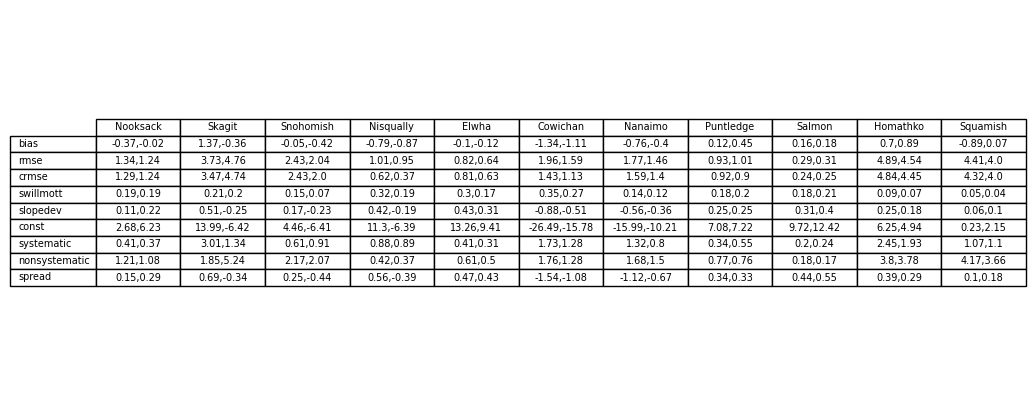

In [60]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')
# table = pd.plotting.table(ax, results_all, loc='center', cellLoc='center', colWidths=list([.2, .2]))
table = pd.plotting.table(ax, results_table, loc='center', cellLoc='center')

In [61]:
results_table

region,Nooksack,Skagit,Snohomish,Nisqually,Elwha,Cowichan,Nanaimo,Puntledge,Salmon,Homathko,Squamish
bias,"-0.37,-0.02","1.37,-0.36","-0.05,-0.42","-0.79,-0.87","-0.1,-0.12","-1.34,-1.11","-0.76,-0.4","0.12,0.45","0.16,0.18","0.7,0.89","-0.89,0.07"
rmse,"1.34,1.24","3.73,4.76","2.43,2.04","1.01,0.95","0.82,0.64","1.96,1.59","1.77,1.46","0.93,1.01","0.29,0.31","4.89,4.54","4.41,4.0"
crmse,"1.29,1.24","3.47,4.74","2.43,2.0","0.62,0.37","0.81,0.63","1.43,1.13","1.59,1.4","0.92,0.9","0.24,0.25","4.84,4.45","4.32,4.0"
swillmott,"0.19,0.19","0.21,0.2","0.15,0.07","0.32,0.19","0.3,0.17","0.35,0.27","0.14,0.12","0.18,0.2","0.18,0.21","0.09,0.07","0.05,0.04"
slopedev,"0.11,0.22","0.51,-0.25","0.17,-0.23","0.42,-0.19","0.43,0.31","-0.88,-0.51","-0.56,-0.36","0.25,0.25","0.31,0.4","0.25,0.18","0.06,0.1"
const,"2.68,6.23","13.99,-6.42","4.46,-6.41","11.3,-6.39","13.26,9.41","-26.49,-15.78","-15.99,-10.21","7.08,7.22","9.72,12.42","6.25,4.94","0.23,2.15"
systematic,"0.41,0.37","3.01,1.34","0.61,0.91","0.88,0.89","0.41,0.31","1.73,1.28","1.32,0.8","0.34,0.55","0.2,0.24","2.45,1.93","1.07,1.1"
nonsystematic,"1.21,1.08","1.85,5.24","2.17,2.07","0.42,0.37","0.61,0.5","1.76,1.28","1.68,1.5","0.77,0.76","0.18,0.17","3.8,3.78","4.17,3.66"
spread,"0.15,0.29","0.69,-0.34","0.25,-0.44","0.56,-0.39","0.47,0.43","-1.54,-1.08","-1.12,-0.67","0.34,0.33","0.44,0.55","0.39,0.29","0.1,0.18"


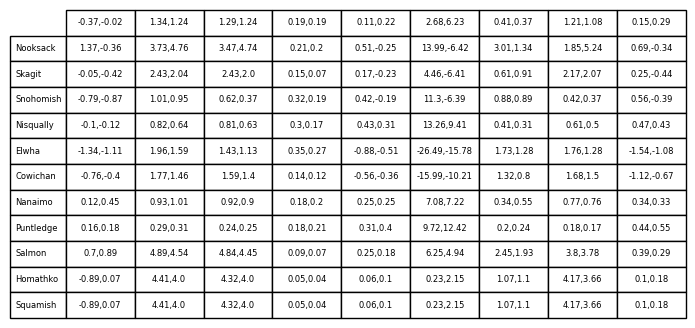

In [62]:
combined_df = results_table.T
fig, ax = plt.subplots(figsize=(8, 4))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create a table
table = ax.table(cellText=combined_df.values,
                 rowLabels=combined_df.index,
                 colLabels=combined_df.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

# Set cell properties for split values
for (i, j), val in np.ndenumerate(combined_df.values):
    cell = table[(i, j)]
    cell.set_text_props(text=val.replace(" | ", '\n'))
    cell.set_fontsize(12)
    cell.set_edgecolor('black')

# # Set header background color
# for i, label in enumerate(table.get_column_labels()):
#     cell = table[(0, i)]
#     cell.set_facecolor('lightgray')

# for i, label in enumerate(table.get_row_labels()):
#     cell = table[(i, -1)]
#     cell.set_facecolor('lightgray')
plt.show()

In [63]:
results_best = results_202111.drop(columns=['model','number'])
regions = results_202111.region.to_list()
for metric in results_best.columns[1:]:
    results_best[metric] = compile_compare(results_201905R, results_202111, metric, regions)
results_best

,region,bias,rmse,crmse,swillmott,slopedev,const,systematic,nonsystematic,spread
11,Nooksack,202111,202111,202111,202111,201905R,201905R,202111,202111,201905R
12,Skagit,202111,201905R,201905R,202111,202111,202111,202111,201905R,202111
13,Snohomish,201905R,202111,202111,202111,201905R,201905R,201905R,202111,201905R
14,Nisqually,201905R,202111,202111,202111,202111,202111,201905R,202111,202111
15,Elwha,201905R,202111,202111,202111,202111,202111,202111,202111,202111
16,Cowichan,202111,202111,202111,202111,202111,202111,202111,202111,202111
17,Nanaimo,202111,202111,202111,202111,202111,202111,202111,202111,202111
18,Puntledge,201905R,201905R,202111,201905R,202111,201905R,201905R,202111,202111
19,Salmon,201905R,201905R,201905R,201905R,201905R,201905R,201905R,202111,201905R
20,Homathko,201905R,202111,202111,202111,202111,202111,202111,202111,202111


Text(0.5, 1.0, 'Number of Obs Per Region')

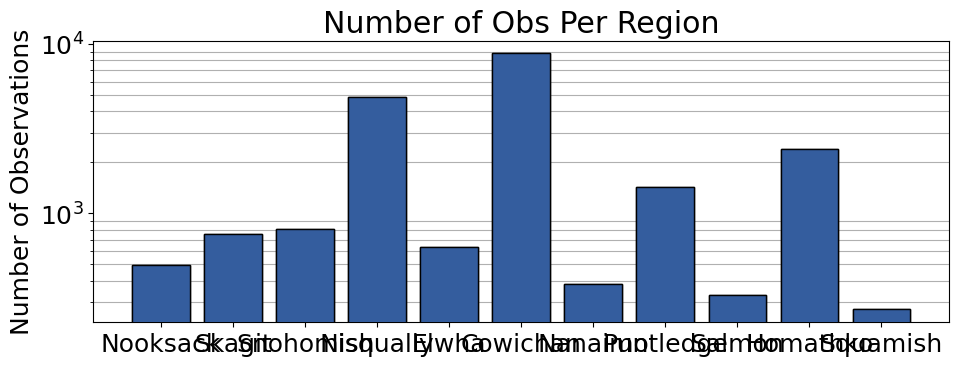

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

ax.grid(axis='y', which='minor', zorder=0)
# ax.scatter(results_all['region'], results_all['number'])
ax.bar(results_all['region'], results_all['number'], color=color3, edgecolor='k', zorder=3)
ax.set_yscale('log')

ax.set_ylabel(r'Number of Observations')
ax.set_title('Number of Obs Per Region')

bias improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Squamish


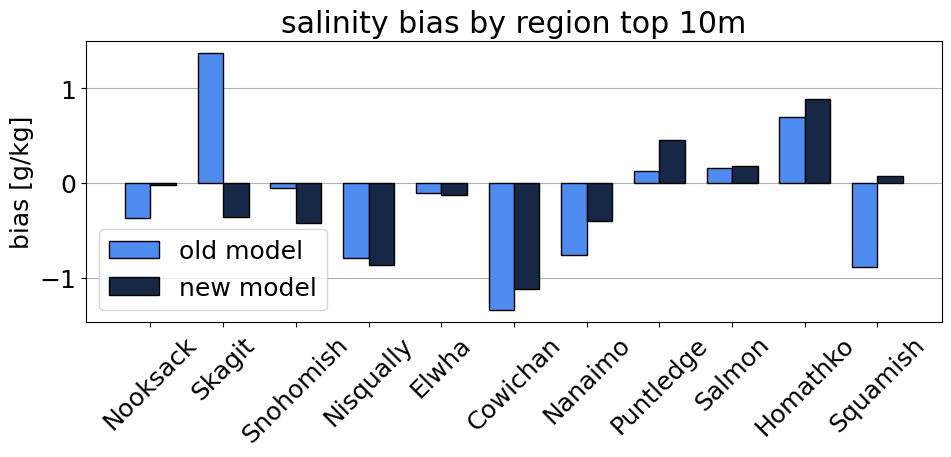

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'bias'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='old model', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='new model', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel('{} [g/kg]'.format(metric))
ax.set_title('salinity ' + metric + ' by region top 10m')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_bias_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

rmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Homathko, Squamish


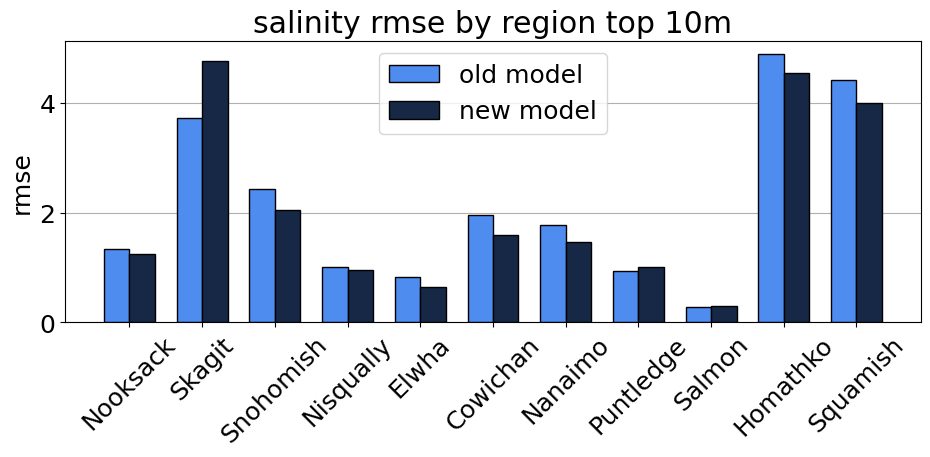

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'rmse'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='old model', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='new model', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel('{}'.format(metric))
ax.set_title('salinity ' + metric + ' by region top 10m')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_bias_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

crmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko, Squamish


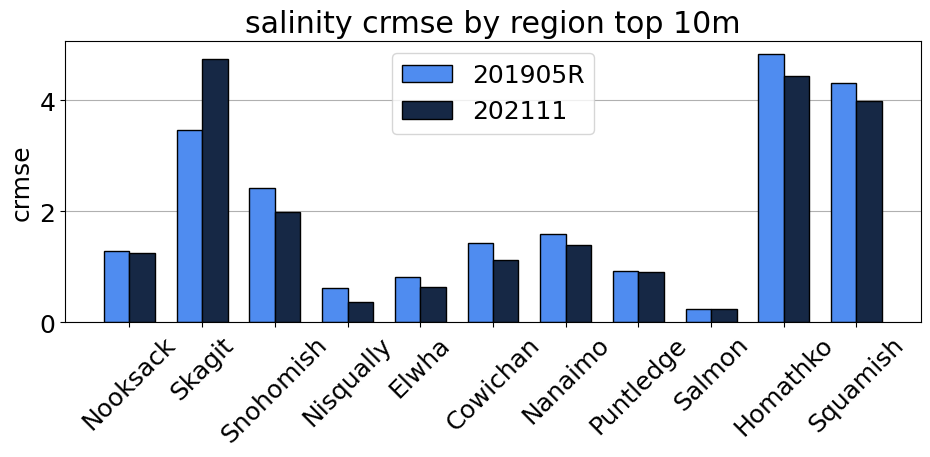

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'crmse'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region top 10m')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_crmse_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

swillmott improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Homathko, Squamish


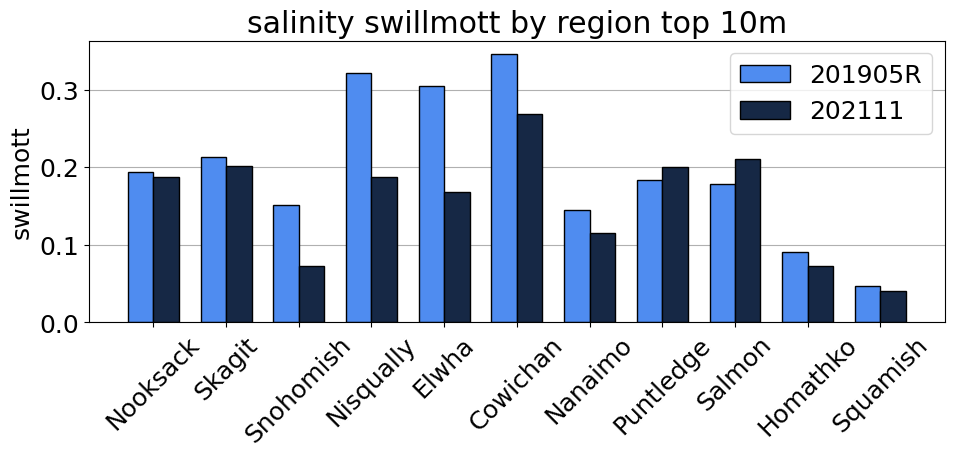

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'swillmott'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region top 10m')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_swillmott_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

slopedev improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko


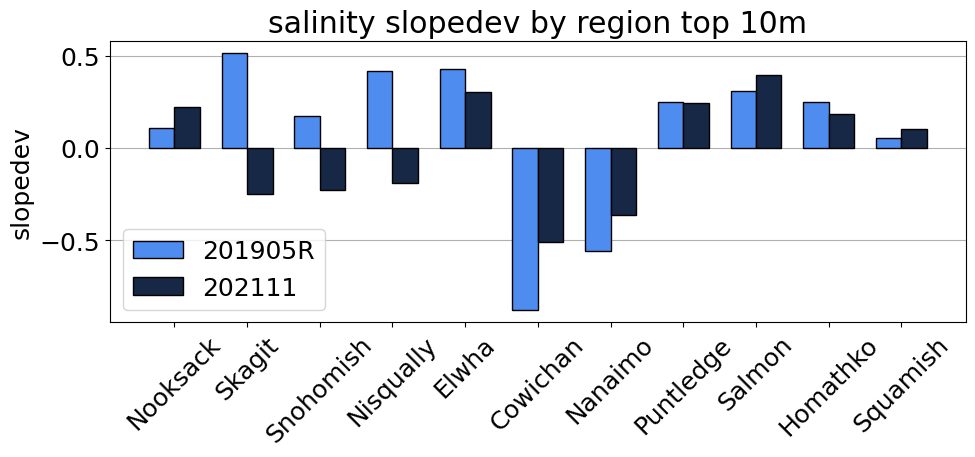

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'slopedev'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region top 10m')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_bias_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

const improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


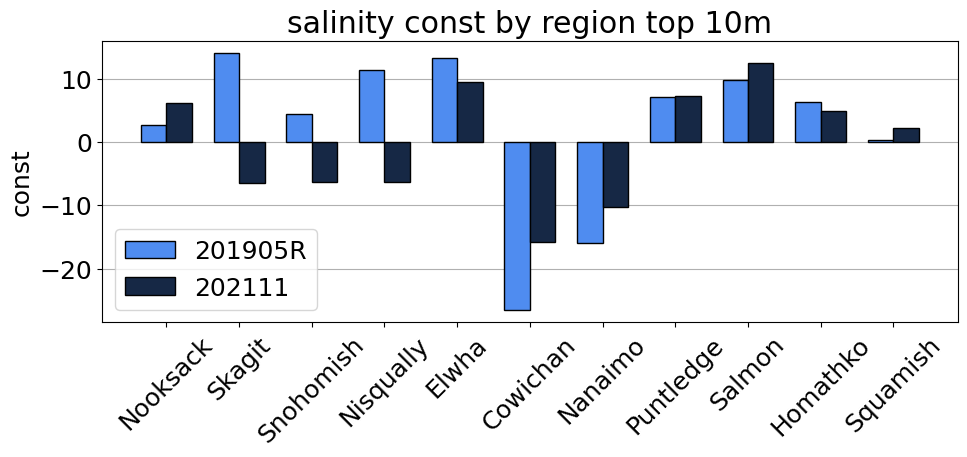

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'const'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region top 10m')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_const_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

systematic improved in 202111 for: Nooksack, Skagit, Elwha, Cowichan, Nanaimo, Homathko


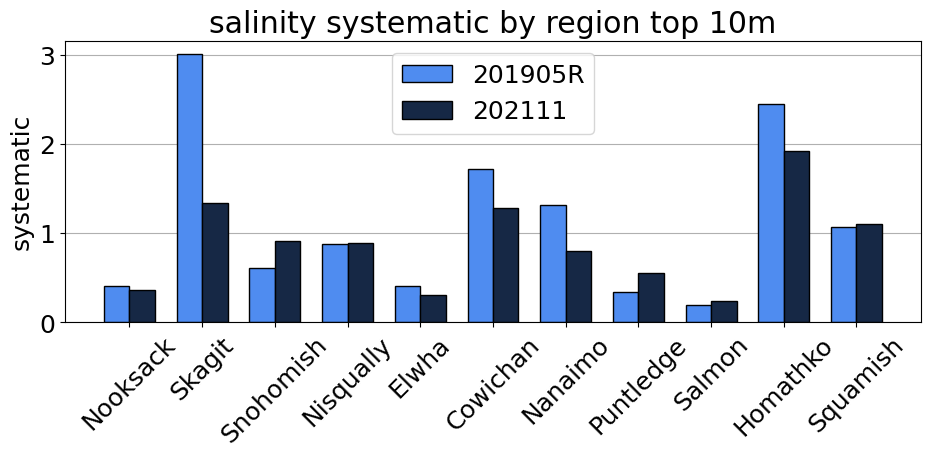

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'systematic'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region top 10m')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_systematic_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

nonsystematic improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish


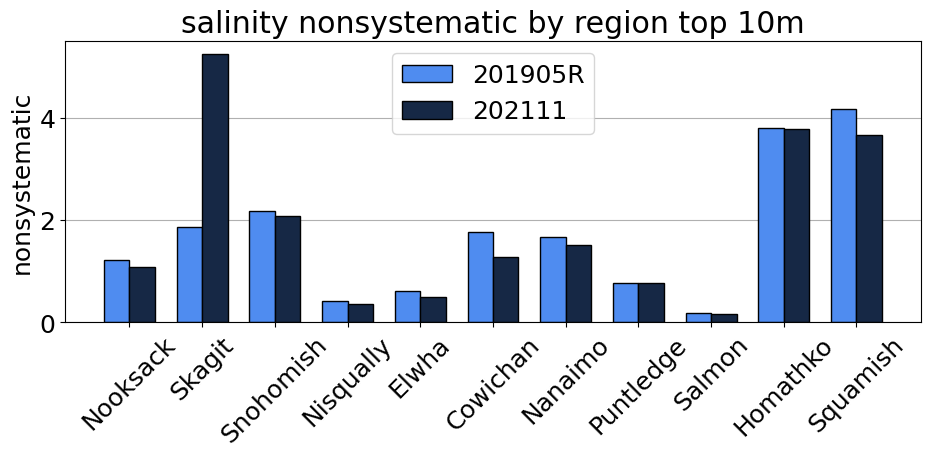

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'nonsystematic'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region top 10m')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_nonsystematic_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

spread improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko


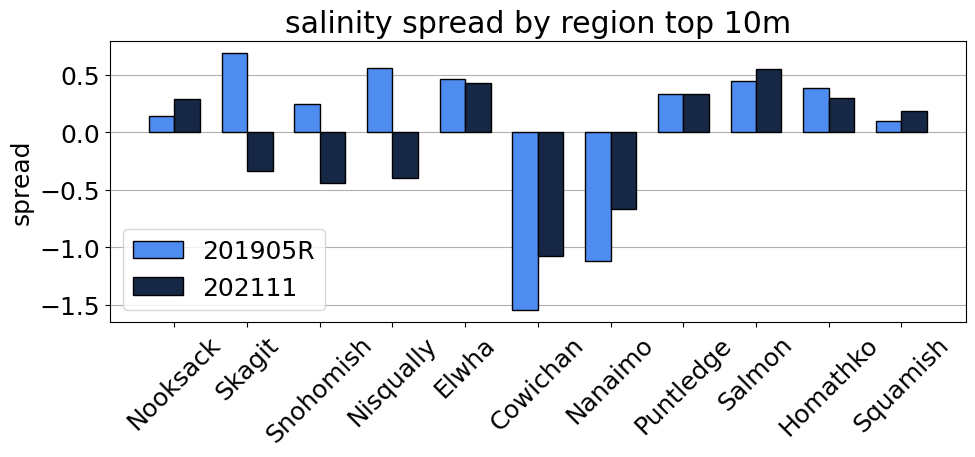

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

metric = 'spread'

bar_width = 0.35
x = range(len(results_201905R['region']))

ax.grid(axis='y', zorder=0)
ax.bar(x, results_201905R[metric], width=bar_width, label='201905R', zorder=2, edgecolor='k', color=color1)
ax.bar([i + bar_width for i in x], results_202111[metric], width=bar_width, label='202111', zorder=2, edgecolor='k', color=color2)
ax.set_ylabel(metric)
ax.set_title('salinity ' + metric + ' by region top 10m')
ax.set_xticks([i + bar_width / 2 for i in x], results_201905R['region'], rotation=45)
ax.legend()

plt.savefig('stats_spread_by_region_bar_nf.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

bias improved in 202111 for: Nooksack, Skagit, Cowichan, Nanaimo, Squamish


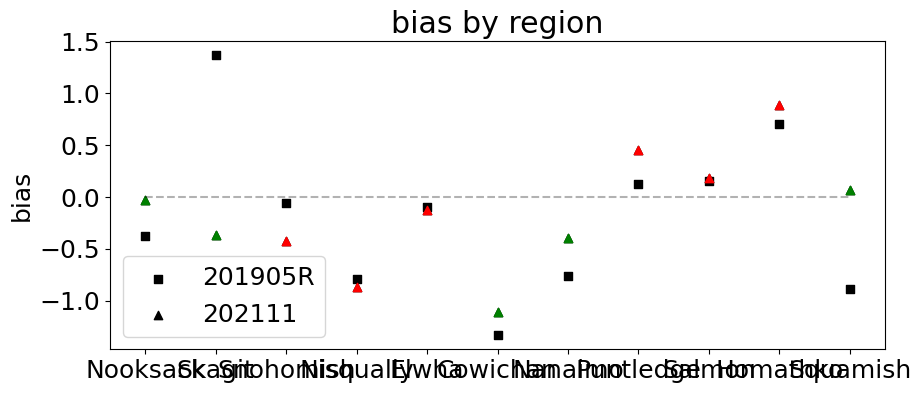

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'bias'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_bias_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

rmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Homathko, Squamish


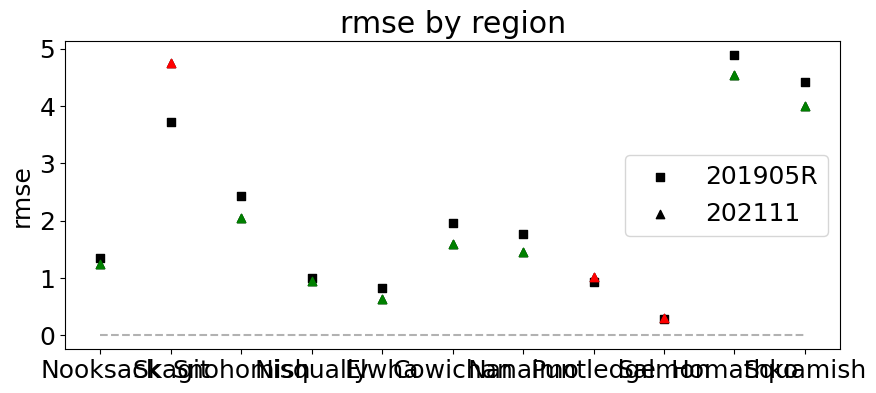

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'rmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_rmse_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

crmse improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko, Squamish


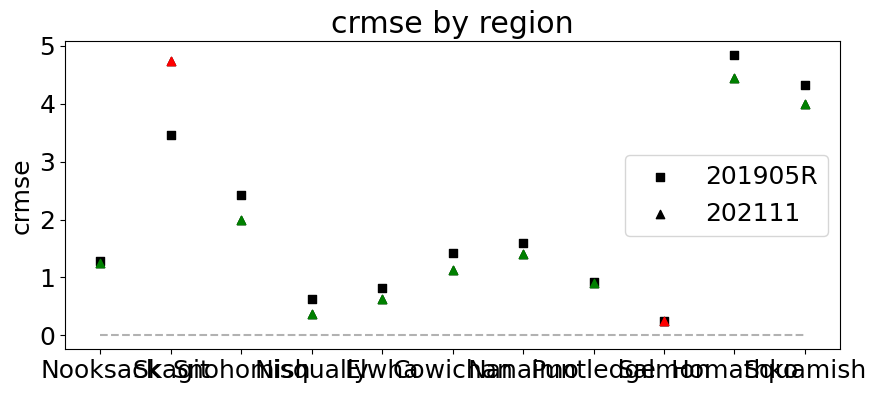

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'crmse'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_crmse_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

swillmott improved in 202111 for: Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Homathko, Squamish


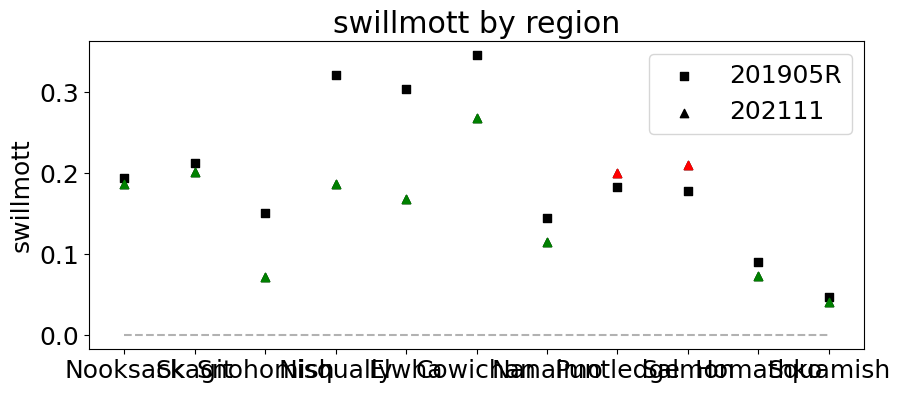

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'swillmott'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_swillmott_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

slopedev improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko


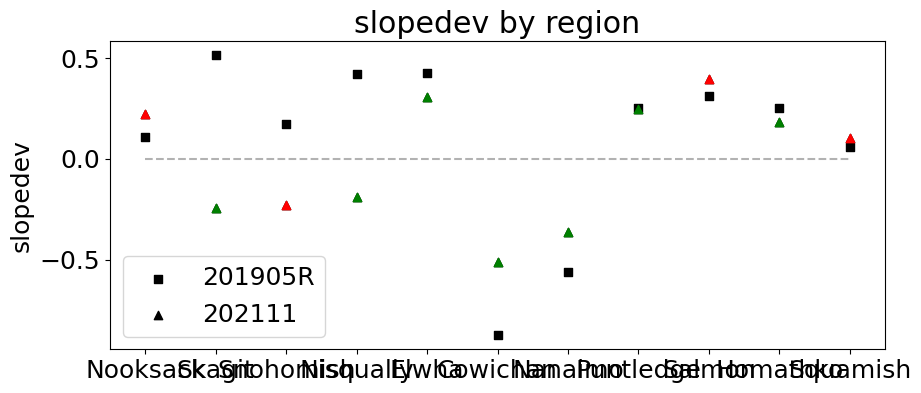

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'slopedev'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_slopedev_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

const improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Homathko


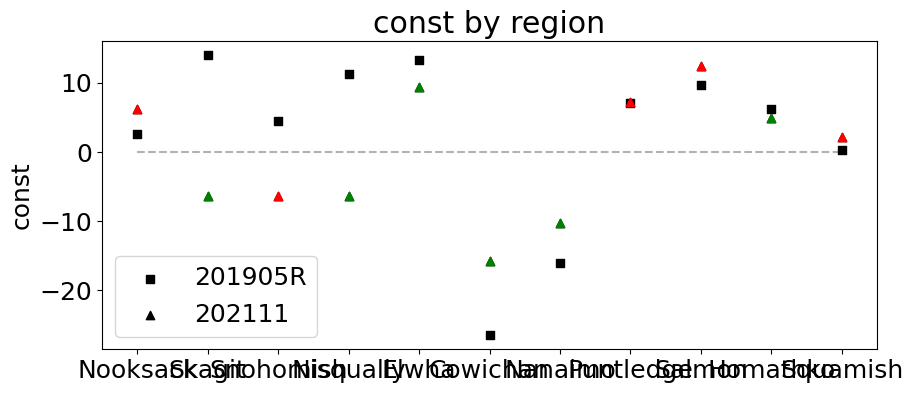

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'const'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_const_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

systematic improved in 202111 for: Nooksack, Skagit, Elwha, Cowichan, Nanaimo, Homathko


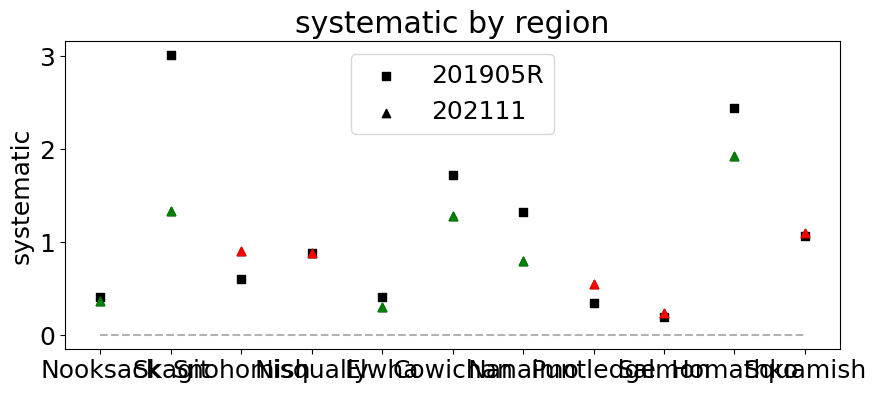

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'systematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_systematic_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

nonsystematic improved in 202111 for: Nooksack, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish


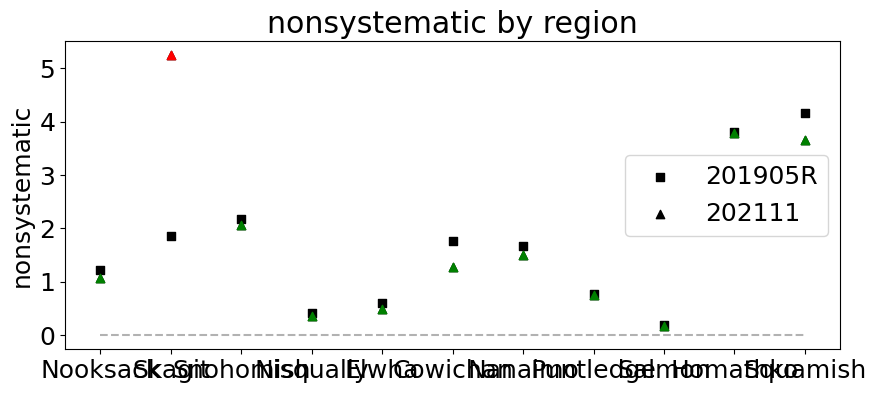

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'nonsystematic'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

plt.savefig('stats_nonsystematic_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)

spread improved in 202111 for: Skagit, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Homathko


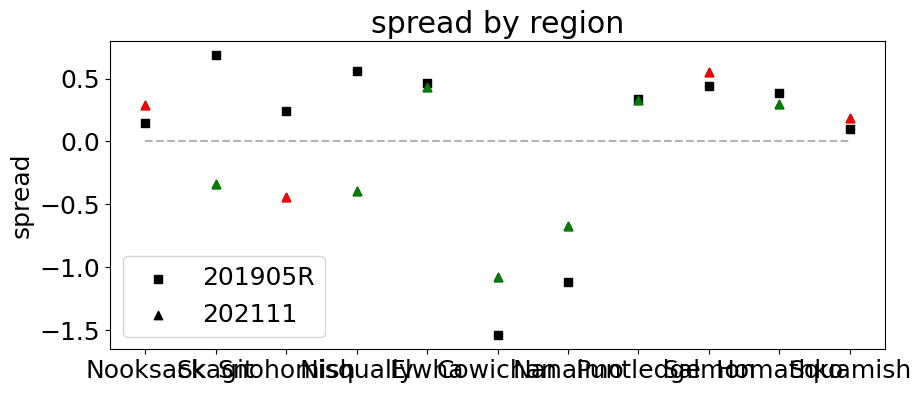

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

metric = 'spread'

ax.scatter(results_201905R['region'], results_201905R[metric],c='k', marker='s',label='201905R')
ax.scatter(results_202111['region'], results_202111[metric],c='k',marker='^',label='202111')

ax.scatter(results_202111[results_best[metric] == '202111']['region'], results_202111[results_best[metric] == '202111'][metric],c='g', marker='^')
ax.scatter(results_202111[results_best[metric] != '202111']['region'], results_202111[results_best[metric] != '202111'][metric],c='r', marker='^')
ax.plot(results_201905R['region'], [0]*len(results_201905R['region']),'k--', alpha=0.3)

ax.set_ylabel(metric)
ax.set_title(metric + ' by region')
ax.legend()

# ax.set_ylim([-1.5, 1.5])  # cropping the nanaimo data which includes all of the ferry data


plt.savefig('stats_spread_by_region.png')

impr = results_202111[results_best[metric] == '202111']['region'].to_list()
mystring = ', '.join(map(str,impr))
print(metric + ' improved in 202111 for: ' + mystring)